<br></br>
# **1. Word Cloud**
**단어별 특징 구분/ 추출**하기

## **1.1 word cloud 만들기**

In [1]:
# ! pip3 install wordcloud

In [2]:
# ! pip3 install matplotlib

In [3]:
f         = open('./data/베를린선언.txt', 'r')
texts_org = f.read()
f.close()

In [4]:
%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family='NanumGothic')

(-0.5, 399.5, 199.5, -0.5)

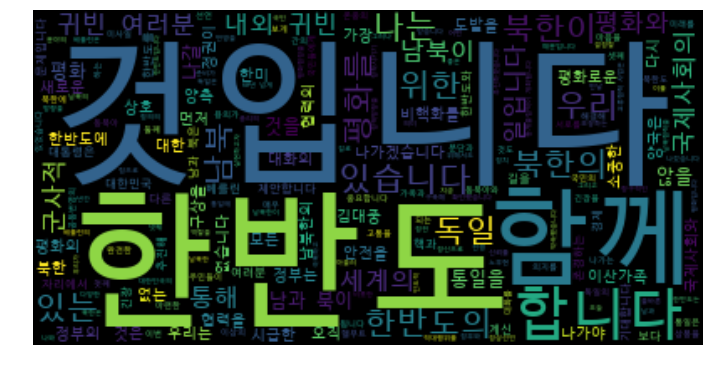

In [5]:
from wordcloud import WordCloud
wcloud = WordCloud('./data/D2Coding.ttf',relative_scaling = 0.2).generate(texts_org)
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

<br></br>
# **2. Token**

<br></br>
## **2.1 Token**
어휘분석

In [6]:
# ! pip3 install -U nltk

In [7]:
# Need to run only ONCE
import nltk
nltk.download('punkt')

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


[nltk_data] Downloading package punkt to /home/yyoo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# 문장부호를 기준으로 문장을 나눈다
text = "자정이 조금 넘은 시각 낯선 남성이 아파트 엘리베이터까지 따라왔다. 층수를 누르는데. 남성은 미동이 없었다. 문이 열리고 집을 향해 걸었다."

from nltk import sent_tokenize
sent_tokenize(text)

['자정이 조금 넘은 시각 낯선 남성이 아파트 엘리베이터까지 따라왔다.',
 '층수를 누르는데.',
 '남성은 미동이 없었다.',
 '문이 열리고 집을 향해 걸었다.']

In [9]:
from nltk import word_tokenize

text = "I want to Drink a beer"
text = word_tokenize(text)
text

['I', 'want', 'to', 'Drink', 'a', 'beer']

<br></br>
## **2.2 Token 의 빈도분석**

In [10]:
from nltk import FreqDist
dict(FreqDist(text))

{'Drink': 1, 'I': 1, 'a': 1, 'beer': 1, 'to': 1, 'want': 1}

In [11]:
texts_token = word_tokenize(texts_org)
texts_token_dict = dict(FreqDist(texts_token))

In [12]:
# ! pip3 install pandas

In [13]:
import pandas as pd
texts_token_series = pd.Series(texts_token_dict)
texts_token_series.sort_values(ascending=False)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


.        168
,         67
것입니다      28
한반도       20
함께        18
합니다       16
있습니다      16
수         15
위한        13
북한의       12
우리        12
한반도의      11
북한이       11
나는        11
이         11
여러분       10
남과        10
평화를       10
독일        10
있는         9
남북         8
’          8
‘          8
더          7
귀빈         7
내외         7
남북이        6
국제사회의      6
세계의        6
통해         6
        ... 
응징을        1
응원하며       1
을          1
은          1
유효합니다      1
유엔         1
유럽통합을      1
유럽통합과      1
유럽의        1
유럽으로       1
유럽에        1
유감을        1
위협하는       1
위협하고       1
위협이        1
위험합니다      1
위험성을       1
위해서는       1
위해         1
위원장과       1
위에서는       1
위에         1
위반했을       1
위로의        1
위대한        1
위기설        1
위기를        1
원칙과        1
우선해야만      1
(          1
Length: 1186, dtype: int64

<br></br>
## **2.3 Regex 정규식**

In [14]:
text = "park 010-1234-1234"

import re
re.findall(r'\d+', text)

['010', '1234', '1234']

In [15]:
re.findall(r'[A-z]\w+', text)

['park']

In [16]:
text = "질문이 있으시면 저의 Web Site의 항목을 참고해 주세요"

from nltk.tokenize import RegexpTokenizer
re_capt = RegexpTokenizer('[A-Z]\w+')
re_capt.tokenize(text)

['Web', 'Site의']

In [17]:
from nltk.tokenize import RegexpTokenizer
re_capt = RegexpTokenizer('[가-힣]\w+')
re_capt.tokenize(text)

['질문이', '있으시면', '저의', '항목을', '참고해', '주세요']

<br></br>
# **3. Stemming (어간추출)**

<br></br>
## **3.1 NLTK 기본포함 모듈의 활용**
1. TreebankWordTokenizer
1. WordPunctTokenizer (정규식 활용)

In [18]:
%%time
text = " Don't hesitate to ask questions"

# Penn Treebank Corpus 에 따른 기준을 사용하여, 문법별로 나눈다
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = tokenizer.tokenize(text)
print(text)

['Do', "n't", 'hesitate', 'to', 'ask', 'questions']
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 284 µs


In [19]:
# NEED TO RUN ONLY ONCE
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/yyoo/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [20]:
from nltk import pos_tag
pos_tag(text)

[('Do', 'VBP'),
 ("n't", 'RB'),
 ('hesitate', 'VB'),
 ('to', 'TO'),
 ('ask', 'VB'),
 ('questions', 'NNS')]

In [21]:
%%time
text = " Don't hesitate to ask questions"

from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
text = tokenizer.tokenize(text)
print(text)

['Don', "'", 't', 'hesitate', 'to', 'ask', 'questions']
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 257 µs


In [22]:
from nltk import pos_tag
pos_tag(text)

[('Don', 'NNP'),
 ("'", 'POS'),
 ('t', 'NN'),
 ('hesitate', 'NN'),
 ('to', 'TO'),
 ('ask', 'VB'),
 ('questions', 'NNS')]

<br></br>
## **3.2 한글과 영문이 섞인경우**
use by Default Setting

In [23]:
text = "이 무더위 속에서 맥주한잔 마시고 싶습니다"
text = word_tokenize(text)
pos_tag(text)

[('이', 'JJ'),
 ('무더위', 'NNP'),
 ('속에서', 'NNP'),
 ('맥주한잔', 'NNP'),
 ('마시고', 'NNP'),
 ('싶습니다', 'NN')]

In [24]:
text = "질문이 있으시면 저희들의 Web Site를 통해서 거침없이 Question 해주세요"

from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = tokenizer.tokenize(text)
text

['질문이', '있으시면', '저희들의', 'Web', 'Site를', '통해서', '거침없이', 'Question', '해주세요']

In [25]:
from nltk import pos_tag
pos_tag(text)

[('질문이', 'JJ'),
 ('있으시면', 'NNP'),
 ('저희들의', 'NNP'),
 ('Web', 'NNP'),
 ('Site를', 'NNP'),
 ('통해서', 'NNP'),
 ('거침없이', 'NNP'),
 ('Question', 'NNP'),
 ('해주세요', 'NN')]

<br></br>
## **3.3 Tag 설명**

In [26]:
import nltk
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /home/yyoo/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [27]:
import nltk.help as nltk_help
nltk_help.upenn_tagset('PRP')  # 대명사

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


In [28]:
nltk_help.upenn_tagset('JJ')  # 형용사

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


<br></br>
# 4. Konlpy를 사용한 한글 분석
<br></br>
## 4.1 한글 에서의 Token 와 Tag 생성

In [29]:
# ! pip3 install konlpy

In [30]:
from konlpy.tag import Okt
twitter = Okt()
text = '단독입찰보다 복수입찰의 경우'
twitter.pos(text)

[('단독', 'Noun'),
 ('입찰', 'Noun'),
 ('보다', 'Josa'),
 ('복수', 'Noun'),
 ('입찰', 'Noun'),
 ('의', 'Josa'),
 ('경우', 'Noun')]

In [31]:
%%time
text = '민병삼 대령의 항명행위로 초치했다'
print(twitter.pos(text))

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('했다', 'Verb')]
CPU times: user 1.26 s, sys: 36 ms, total: 1.3 s
Wall time: 374 ms


In [32]:
%%time
text = '민병삼 대령의 항명행위로 초치했다'
print(twitter.pos(text, stem=True))

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('하다', 'Verb')]
CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 11.2 ms


In [33]:
%%time
    
# 신조어 또는 사용자가 원하는 임의 태그를 사용하고 싶은경우
text = '민병삼 대령의 항명행위로 초치했다'
print(twitter.pos(text, stem=True))

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('하다', 'Verb')]
CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 9.59 ms


In [34]:
%%time
text = '민병삼 대령의 항명행위로 초치했다'

from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.pos(text))

[('민병', 'NNG'), ('삼', 'NNG'), ('대령', 'NNG'), ('의', 'JKG'), ('항명', 'NNG'), ('행위', 'NNG'), ('로', 'JKM'), ('초치', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('다', 'EFN')]
CPU times: user 10.1 s, sys: 208 ms, total: 10.3 s
Wall time: 2.9 s


In [35]:
%%time
text = '민병삼 대령의 항명행위로 초치했다'

from konlpy.tag import Hannanum
han = Hannanum()
print(han.pos(text))

[('민병삼', 'N'), ('대령', 'N'), ('의', 'J'), ('항명행위', 'N'), ('로', 'J'), ('초치했다', 'N')]
CPU times: user 1.12 s, sys: 32 ms, total: 1.15 s
Wall time: 317 ms


<br></br>
## **4.2 한글 WordCloud 만들기**

In [36]:
# 독일 퀘르버 재단 연설문 : 베를린 선언
f     = open('./data/베를린선언.txt', 'r')
texts_org = f.read()
f.close()

In [37]:
texts_nouns = twitter.nouns(texts_org)
texts_nouns[:10]

['존경', '독일', '국민', '여러분', '고국', '국민', '여러분', '하울', '젠', '쾨르버']

In [38]:
result_nouns = ''
for txt in texts_nouns:
    result_nouns += " " + txt

result_nouns[:500]

' 존경 독일 국민 여러분 고국 국민 여러분 하울 젠 쾨르버 재단 이사 모드 전 동독 총리 비롯 내외 귀빈 여러분 먼저 냉전 분단 통일 그 힘 유럽 통합 국제 평화 선도 독일 독일 국민 무한 경의 표 오늘 이 자리 마련 주신 독일 정부 쾨르버 재단 감사 얼마 전 별세 헬 무트 콜 총리 가족 독일 국민 은 애도 위로 마음 전 대한민국 냉전 시기 환경 속 적극 능동 외교 독일 통일 유럽 통합 헬 무트 콜 총리 업적 기억 것 내외 귀빈 여러분 곳 베를린 지금 전 한국 김대중 대통령 남북 화해 협력 기틀 마련 베를린 선언 발표 곳 여기 알테스 슈 타트 하우스 독일 통일 조약 협상 역사 현장 나 오늘 베를린 교훈 이 자리 대한민국 새 정부 한반도 평화 구상 내외 귀빈 여러분 독일 통일 경험 지구 마지막 분단국가 우리 통일 대한 희망 우리 방향 말 그것 우선 통일 과정 중요성 독일 통일 상호 존중 바탕 평화 협력 과정 얼마나 일 독일 국민 이 과정 축적 신뢰 바탕 스스로 통일 결정 수 서독 시민'

(-0.5, 399.5, 199.5, -0.5)

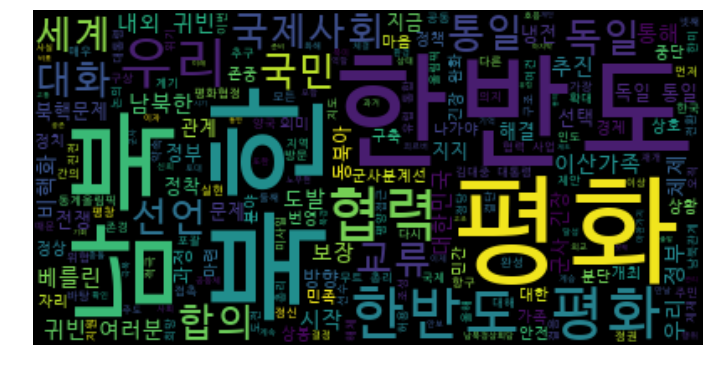

In [39]:
%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family='NanumGothic')

from wordcloud import WordCloud
wcloud = WordCloud('./data/D2Coding.ttf',relative_scaling = 0.2).generate(result_nouns)
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")